In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
na_vals = ["NA", "Na", "NaN", "Missing"]
df = pd.read_csv("general_data.csv", na_values = na_vals, index_col = "EmployeeID")
df_schema = pd.read_excel("data_dictionary.xlsx", sheet_name=0, index_col = "Variable")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1.0,Y,11,8,0,1.0,6,1,0,0
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,0.0,Y,23,8,1,6.0,3,5,1,4
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,1.0,Y,15,8,3,5.0,2,5,0,3
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,3.0,Y,11,8,3,13.0,5,8,7,5
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
df.drop_duplicates()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1.0,Y,11,8,0,1.0,6,1,0,0
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,0.0,Y,23,8,1,6.0,3,5,1,4
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,1.0,Y,15,8,3,5.0,2,5,0,3
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,3.0,Y,11,8,3,13.0,5,8,7,5
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,28,Yes,Travel_Rarely,Human Resources,1,3,Medical,1,Female,2,...,1.0,Y,16,8,1,NaN,2,1,0,0
3911,41,No,Non-Travel,Sales,2,2,Medical,1,Male,2,...,NaN,Y,14,8,2,10.0,5,3,1,2
4227,36,No,Travel_Rarely,Research & Development,2,3,Life Sciences,1,Male,2,...,NaN,Y,17,8,0,5.0,2,1,0,0


In [5]:
df.drop(columns = ["Over18", "EmployeeCount"], inplace=True)

In [6]:
attritioned = df["Attrition"] == "Yes"
df_left = df[attritioned]

In [7]:
df_left.median()

Age                           32.0
DistanceFromHome               7.0
Education                      3.0
JobLevel                       2.0
MonthlyIncome              49080.0
NumCompaniesWorked             1.0
PercentSalaryHike             14.0
StandardHours                  8.0
StockOptionLevel               1.0
TotalWorkingYears              7.0
TrainingTimesLastYear          3.0
YearsAtCompany                 3.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           2.0
dtype: float64

In [8]:
df_stay = df[df["Attrition"] == "No"]
df_stay.median()

Age                           36.0
DistanceFromHome               7.0
Education                      3.0
JobLevel                       2.0
MonthlyIncome              49300.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
StandardHours                  8.0
StockOptionLevel               1.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 6.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [9]:
df_compare = pd.concat([df_stay.median(), df_left.median()], axis="columns") 
df_compare.rename(columns ={0: "StayedMedian", 1: "LeftMedian"})

,StayedMedian,LeftMedian
Age,36.0,32.0
DistanceFromHome,7.0,7.0
Education,3.0,3.0
JobLevel,2.0,2.0
MonthlyIncome,49300.0,49080.0
NumCompaniesWorked,2.0,1.0
PercentSalaryHike,14.0,14.0
StandardHours,8.0,8.0
StockOptionLevel,1.0,1.0
TotalWorkingYears,10.0,7.0


<p style="color: #333; font-size: 18px">From the above table, we can make the following assumptions</p>

<h2>Hypothesis 1:</h2>
<p style = "font-size: 20px">The median monthly income of the people who left is lower than the rest, i.e. it's less than  49300.0 units</p>

<p>Ho:µ <= 49300.0 <br>
Ha:µ > 49300.0<br>
Hence we will be using right test statistic</p>

Using a sample of 70 employees who left

In [10]:
print(df_left.head(70)["MonthlyIncome"].median())
df_left.head(70)["MonthlyIncome"].std()

44915.0


39711.70398399733

<p>Sample mean = 44915.0<br>
Population std deviation = 39711.704<br>
Assuming α = 0.05<br>
Hence confidence level = 0.95<br>
</p>
<p>Hence we will be using z test</p>

<h2>Hypothesis 2:</h2>
<p style = "font-size: 20px">The employees who left may have not like the current manager and the median of years spent with the him/her less than 3 years</p>

<p>Ho:µ <= 3 <br>
Ha:µ > 3<br>
Hence we will be using right test statistic</p>


Using a sample of 70 employees who left

In [11]:
print(df_left.head(70)["YearsWithCurrManager"].median())
df_left.head(70)["YearsWithCurrManager"].std()

2.0


2.7437487767462385

<p>Sample mean = 2.0<br>
Population std deviation = 2.744<br>
Assuming α = 0.05<br>
Hence confidence level = 0.95<br>
</p>
<p>Hence we will be using z test</p>

<h2>Hypothesis 3:</h2>
<p style = "font-size: 20px">Stayed employees have a median age 36, hence they may have tend to settle in instead of leaving the job</p>

<p>Ho:µ = 36 <br>
Ha:µ != 36<br>
Hence we will be using Two tail test statistic</p>

Using a sample of 70 employees who left

In [12]:
print(df_left.head(70)["Age"].median())
df_left.head(70)["Age"].std()

30.0


10.187070114391476

<p>Sample mean = 30.0<br>
Population std deviation = 10.187<br>
Assuming α = 0.05<br>
Hence confidence level = 0.95<br>
</p>
<p>Hence we will be using z test</p>

<h2>Hypothesis 4:</h2>
<p style = "font-size: 20px">Median total number of years spent at the company by the people who stayed isn't less than 5 years, hence they have seemed to become loyal to their job</p>

<p>Ho:µ >= 5 <br>
Ha:µ < 5 <br>
Hence we will be using left test statistic</p>

Using a sample of 70 employees who left

In [13]:
print(df_left.head(70)["YearsAtCompany"].median())
df_left.head(70)["YearsAtCompany"].std()

3.0


4.741102596467171

<p>Sample mean = 3.0<br>
Population std deviation = 4.741<br>
Assuming α = 0.05<br>
Hence confidence level = 0.95<br>
</p>
<p>Hence we will be using z test</p>

<h2>Hypothesis 5:</h2>
<p style = "font-size: 20px">Median of total working years of employees who left was lest than the median of who stayed i.e 10 years, due to which they could have been fired due to lack of experience/skills</p>

<p>Ho:µ <= 10 <br>
Ha:µ > 10 <br>
Hence we will be using right test statistic</p>

Using a sample of 70 employees who left

In [14]:
print(df_left.head(70)["TotalWorkingYears"].median())
df_left.head(70)["TotalWorkingYears"].std()

6.0


6.399162082829191

<p>Sample mean = 6.0<br>
Population std deviation = 6.399<br>
Assuming α = 0.05<br>
Hence confidence level = 0.95<br>
</p>
<p>Hence we will be using z test</p>

In [15]:
df_dep_pct = pd.concat([df["Department"].value_counts(), df_left["Department"].value_counts()], axis="columns")
df_dep_pct.columns = ["TotalNumber", "NumberLeft"]
df_dep_pct["Percentage_left"] = df_dep_pct["NumberLeft"]/df_dep_pct["TotalNumber"] * 100
df_dep_pct

,TotalNumber,NumberLeft,Percentage_left
Research & Development,2883,453,15.712799
Sales,1338,201,15.022422
Human Resources,189,57,30.158730


<p style="color: #333; font-size: 18px">From the above table, we can make the following assumptions</p>

<h2>Hypothesis 6:</h2>
<p style = "font-size: 20px">Percentage of employees leaving from HR department is not less than 30%</p>

<p>Ho:µ >= 30 <br>
Ha:µ > 30 <br>
Hence we will be using left test statistic</p>

<h2>Hypothesis 7:</h2>
<p style = "font-size: 20px">Number of employees that have left in Research & Development department is 201</p>

<p>Ho:µ == 201 <br>
Ha:µ != 201 <br>
Hence we will be using two tail test statistic</p>

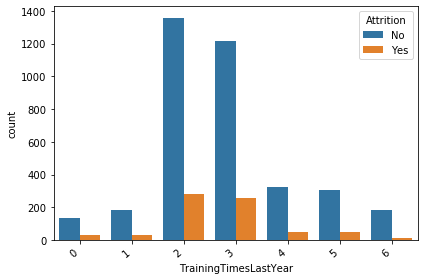

In [16]:
ax = sns.countplot(x="TrainingTimesLastYear", hue="Attrition", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<h2>Hypothesis 8:</h2>
<p style = "font-size: 20px">Employees who had trained 2 times last year have left the most than the rest</p>

<p>Ho:µ == 201 <br>
Ha:µ != 201 <br>
Hence we will be using two tail test statistic</p>

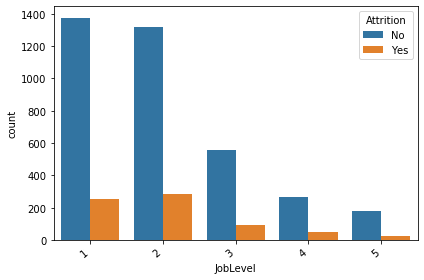

In [17]:
ax = sns.countplot(x="JobLevel", hue="Attrition", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<h2>Hypothesis 9:</h2>
<p style = "font-size: 20px">Number of employees who left and had a job level of three or more won't be more than 180</p>

<p>Ho:µ <= 180 <br>
Ha:µ > 180<br>
Hence we will be using right tail test statistic</p>

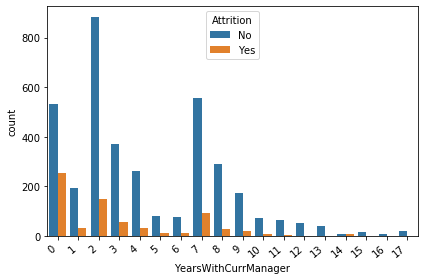

In [18]:
ax = sns.countplot(x="YearsWithCurrManager", hue="Attrition", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<h2>Hypothesis 10:</h2>
<p style = "font-size: 20px">Number of employees left on the zeroth year with the current manager isn't less than 200</p>

<p>Ho:µ >= 180 <br>
Ha:µ < 180<br>
Hence we will be using left tail test statistic</p>